<a href="https://colab.research.google.com/github/ANSHIKA1806/MachineLearning_Algorithms/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SUPPORT VECTOR REGRESSION


Support vector regression or SVR is a machine learning algorithm which automatically finds a good fit for a trend, not necessarily a linear one, but by using best expression which determines a proper relation. SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. Truly speaking, SVR is the combination of all its prior regression algorithms. Practically it is used for classifaction based problems, but it is also quite helpful for solving regression use cases.

####Building the ML model :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print("All packages have been included successfully!")

All packages have been included successfully!


####2. Importing the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Position_Salaries.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


####3. Building the model

In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values.reshape(-1,1)
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict([[12.5]])
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[252789.13920842]])

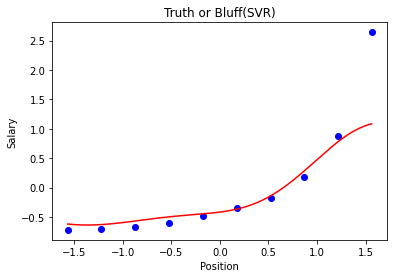

In [ ]:
X_grid = np.arange(min(X),max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter (X, y, color ="blue")
plt.plot(X_grid, regressor.predict(X_grid), color = "red")
plt.title("Truth or Bluff(SVR)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()